In [15]:
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()

df_columbia_1h_2025 = pd.read_sql("select * from auto.vi_test_summary_unified_reporting tsr join md2.test_types tt using (test_type_id) where tsr.collection_set_id = 12698 and tsr.test_type_id in (19, 20);",
                                      con=os.getenv('RSR_SVC_CONN'))

df_columbia_1h_2025.head()

,test_type_id,product_period_id,product_period,collection_set_id,collection_set,test_event_id,device_event_id,collection_area_id,collection_type_id,carrier_id,...,task_speed_median,task_speed_5th_percentile,task_speed_95th_percentile,video_stall_severity,name,source_type,insert_time,update_time,friendly_name,lma_name
0,19,37,2025-1H,12698,Columbia-SC_2025-1H,203230364,6797311158,165,1,4,...,14.598342,None,None,None,TST_DATA_SPEED_SEND_NDP,Upload2,2014-04-18 21:42:40.311373,2018-05-15 19:00:36.097857,Uplink Throughput,UPLOAD
1,19,37,2025-1H,12698,Columbia-SC_2025-1H,203230340,6797307992,165,1,478,...,11.736922,None,None,None,TST_DATA_SPEED_SEND_NDP,Upload2,2014-04-18 21:42:40.311373,2018-05-15 19:00:36.097857,Uplink Throughput,UPLOAD
2,20,37,2025-1H,12698,Columbia-SC_2025-1H,203230341,6797308080,165,1,478,...,574.281720,None,None,None,TST_DATA_SPEED_RECV_NDP,Download2,2014-04-18 21:42:40.311407,2018-05-15 19:00:36.097789,Downlink Throughput,DOWNLOAD
3,19,37,2025-1H,12698,Columbia-SC_2025-1H,203230366,6797311745,165,1,4,...,65.597881,None,None,None,TST_DATA_SPEED_SEND_NDP,Upload2,2014-04-18 21:42:40.311373,2018-05-15 19:00:36.097857,Uplink Throughput,UPLOAD
4,20,37,2025-1H,12698,Columbia-SC_2025-1H,203230370,6797311964,165,1,4,...,1151.940240,None,None,None,TST_DATA_SPEED_RECV_NDP,Download2,2014-04-18 21:42:40.311407,2018-05-15 19:00:36.097789,Downlink Throughput,DOWNLOAD


In [16]:
carrier_color_dict = {
                        'Verizon': '#b00000',
                        'AT&T': '#067ab4',
                        'T-Mobile': '#e60076',
                        'Sprint': '#ffaa00',
                        'Dish': '#3F3F3F',
                        'EE': '#2e9b9d',
                        'O2': '#010066',
                        'Three': '#000000',
                        'Vodafone': '#f80000',
                        'O2 UK': '#010066',
                        'Three UK': '#000000',
                        'Vodafone UK': '#f80000',
                        'Sunrise': '#d0606f',
                        'Swisscom': '#5b92cc',
                        'Salt': '#56bf83',
                        'ODIDO': '#FF7621',
                        'KPN': '#FFBB00',
                        'Vodafone NL': '#f80000',
                        'KT': '#FF7621',
                        'SK Telecom': '#FFBB00',
                        'LG U+': '#f80000',
                     }

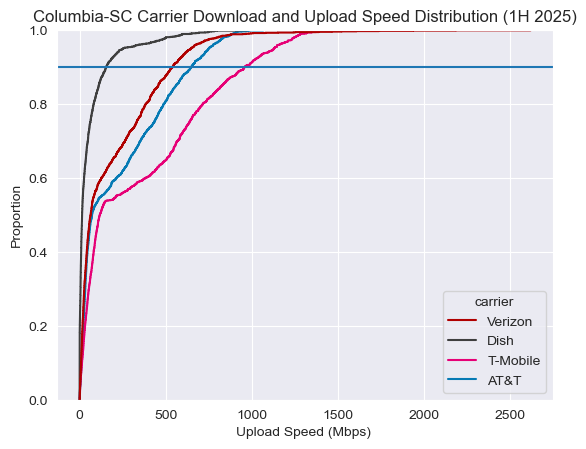

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_columbia_1h_2025

sns.ecdfplot(data=df, x="task_speed_median", hue="carrier", palette=carrier_color_dict)
plt.title("Columbia-SC Carrier Download and Upload Speed Distribution (1H 2025)")
plt.xlabel("Upload Speed (Mbps) ")
plt.axhline(0.9)
plt.grid(True)
plt.savefig("Columbia-SC Carrier Download and Upload Speed Distribution (1H 2025)", format="png")
plt.show()